<a href="https://colab.research.google.com/github/Aditya-Poli/EC312_GA/blob/main/GA_KS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KnapSack

In [ ]:
class knapsack:

    def __init__(self, numItems=5, weights=None, limit=10):
        self.numItems = numItems
        self.weights = weights
        self.limit = limit;
        self._pop = None
        self._bestPop = None
        self._bestFit = None
        self._Variants = None

    def _getWeight(self,Item):
        weight = 0
        if self.weights == None:
            self.weights = {i : 1 for i in range(1, self.numItems+1)}
        for _ in range(1, len(Item)+1):
            if(Item[_ - 1] != '0'):
                weight += self.weights[_]
        return weight

    def fitness(self):
        return np.array([self._getWeight(pop) for pop in self._pop])

    def selection(self):
        fitness = np.array([val if (val - self.limit) < 0 else 0 for val in self.fitness()])
        # print(fitness)
        prob = fitness / np.sum(fitness)
        return np.random.choice(self._pop, size=1, replace=True, p=prob)
    
    def crossover(self, parent1, parent2):
        idx = np.random.randint(0, len(parent1))
        return parent1[:idx] + parent2[idx:]
    
    def mutate(self, child, mutProb=0.1):
        child = list(child)
        if np.random.random() <= mutProb:
            idx1 = np.random.randint(0, len(child), size=1)
            child[idx1[0]] = '1'
        return ''.join(child)

    def _generatePop(self, popSize):
        pop = []
        for _ in range(popSize):
            pop.append(''.join(map(str, list(np.random.randint(2,size=self.numItems)))))
        return np.array(pop)

    def variants(self):
        return self._Variants
    
    def run(self, popSize=50, nIter=50):

        self._pop = self._generatePop(popSize)
        # print(self._pop)
        for _ in tqdm(range(1, nIter+1), file=sys.stdout):
            if np.sum(self.fitness() - self.limit) == 0:
                print(f"StopIteration {_}: Best Population : {list(self._bestPop)}  Fitness: {self._bestFit}")
                break
            newPop = []
            for i in range(popSize):
                parent1 = self.selection()
                parent2 = self.selection()
                child = self.crossover(*parent1, *parent2)
                child = self.mutate(child)
                newPop.append(child)
            self._pop = newPop
            fitness = np.array([val if (val - self.limit) < 0 else 0 for val in self.fitness()])
            if self._bestFit == None or np.max(fitness) > self._bestFit:
                self._bestFit = np.max(fitness)
                self._bestPop = self._pop[np.argmax(self.fitness())]
                self._Variants = np.array([pop for pop in self._pop if self._getWeight(pop) == self._bestFit])

            print(f"Iteration {_}: Best Population : {list(self._bestPop)}  Fitness: {self._bestFit}")


            


In [ ]:
ks = knapsack(numItems=10, weights={i:np.random.randint(1, 100, size=1)[0] for i in range(1, 31)}, limit=200)

In [ ]:
ks.run()

  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 1: Best Population : ['1', '0', '0', '1', '0', '1', '1', '1', '0', '1']  Fitness: 199
Iteration 2: Best Population : ['1', '0', '0', '1', '0', '1', '1', '1', '0', '1']  Fitness: 199
Iteration 3: Best Population : ['1', '0', '0', '1', '0', '1', '1', '1', '0', '1']  Fitness: 199
Iteration 4: Best Population : ['1', '0', '0', '1', '0', '1', '1', '1', '0', '1']  Fitness: 199
Iteration 5: Best Population : ['1', '0', '0', '1', '0', '1', '1', '1', '0', '1']  Fitness: 199
Iteration 6: Best Population : ['1', '0', '0', '1', '0', '1', '1', '1', '0', '1']  Fitness: 199
Iteration 7: Best Population : ['1', '0', '0', '1', '0', '1', '1', '1', '0', '1']  Fitness: 199
Iteration 8: Best Population : ['1', '0', '0', '1', '0', '1', '1', '1', '0', '1']  Fitness: 199
Iteration 9: Best Population : ['1', '0', '0', '1', '0', '1', '1', '1', '0', '1']  Fitness: 199
Iteration 10: Best Population : ['1', '0', '0', '1', '0', '1', '1', '1', '0', '1']  Fitness: 199
Iteration 11: Best Population : ['1', '

In [ ]:
ks.variants()

array(['0010111111'], dtype='<U10')

In [ ]:
prob = np.array([10, 31, 68])
prob = prob / np.sum(prob)
np.random.choice(['1001', '0000', '1111'], size=2, replace=True, p=prob)

array(['0000', '1001'], dtype='<U4')

In [ ]:
cond = 5
[val if val % cond == 0 else 0 for val in range(1, 21)]

[0, 0, 0, 0, 5, 0, 0, 0, 0, 10, 0, 0, 0, 0, 15, 0, 0, 0, 0, 20]

In [ ]:
np.random.randint(0, 2, size=5)

array([0, 0, 0, 0, 1])

In [ ]:
np.random.randint(1, 100, size=1)[0]

77

In [ ]:
def _generatePop(popSize):
    pop = []
    for _ in range(popSize):
        pop.append(''.join(map(str, list(np.random.randint(2,size=5)))))
    return np.array(pop)

_generatePop(10)

array(['01111', '11011', '11001', '01000', '00010', '01101', '01110',
       '00000', '11011', '01101'], dtype='<U5')

In [ ]:
def _getWeight(Item):
    weight = 0
    global weights
    if weights == None:
        weights = {i : 1 for i in range(1, numItems+1)}
    for _ in range(1, len(Item)+1):
        if(Item[_ - 1] != '0'):
            weight += weights[_]
    return weight

def fitness():
    return np.array([_getWeight(pop) for pop in _pop])

global _pop
global numItems
global weights


numItems = 10
weights = {i:np.random.randint(1, 200, size=1)[0] for i in range(1, numItems+1)}
_pop = _generatePop(numItems)
print(_pop)
print(fit:=fitness())

['11100' '01001' '00011' '00000' '01101' '00100' '11101' '00110' '11100'
 '00100']
[488 370 274   0 496 126 681 207 488 126]


In [ ]:
fitness = np.array([val if (val - 200) < 0 else 0 for val in fit])
print(fitness)
prob = fitness / np.sum(fitness)

[  0   0   0   0   0 126   0   0   0 126]


In [ ]:
prob

array([0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0.5])

In [ ]:
class knpsk:

    def __init__(self, numItems=5, weights=None, limit=10):
        self.numItems = numItems
        self.weights = weights
        self.limit = limit;
        self._pop = None
        self._bestPop = None
        self._bestFit = None
        self._Variants = None

    def _getWeight(self,Item):
        weight = 0
        if self.weights == None:
            self.weights = {i : 1 for i in range(1, self.numItems+1)}
        for _ in range(1, len(Item)+1):
            if(Item[_ - 1] != '0'):
                weight += self.weights[_]
        return weight

    def fitness(self):
        return np.array([self._getWeight(pop) for pop in self._pop])

    def selection(self):
        fitness = np.array([val if (val - self.limit) < 0 else 0 for val in self.fitness()])
        # print(fitness)
        prob = fitness / np.sum(fitness)
        prob = np.array([p if p != np.nan else 0 for p in prob])
        return np.random.choice(self._pop, size=1, replace=True, p=prob)
    
    def crossover(self, parent1, parent2):
        idx = np.random.randint(0, len(parent1))
        return parent1[:idx] + parent2[idx:]
    
    def mutate(self, child, mutProb=0.1):
        child = list(child)
        if np.random.random() <= mutProb:
            idx1 = np.random.randint(0, len(child), size=1)
            child[idx1[0]] = '1'
        return ''.join(child)

    def _generatePop(self, popSize):
        pop = []
        for _ in range(popSize):
            pop.append(''.join(map(str, list(np.random.randint(2,size=self.numItems)))))
        return np.array(pop)

    def variants(self):
        return self._Variants
    
    def run(self, popSize=50, nIter=50):

        self._pop = self._generatePop(popSize)
        # print(self._pop)
        for _ in tqdm(range(1, nIter+1), file=sys.stdout):
            if np.sum(self.fitness() - self.limit) == 0:
                print(f"StopIteration {_}: Best Population : {list(self._bestPop)}  Fitness: {self._bestFit}")
                break
            newPop = []
            for i in range(popSize):
                parent1 = self.selection()
                parent2 = self.selection()
                child = self.crossover(*parent1, *parent2)
                child = self.mutate(child)
                newPop.append(child)
            self._pop = newPop
            fitness = np.array([val if (val - self.limit) < 0 else 0 for val in self.fitness()])
            if self._bestFit == None or np.max(fitness) > self._bestFit:
                self._bestFit = np.max(fitness)
                self._bestPop = self._pop[np.argmax(self.fitness())]
                self._Variants = np.array([pop for pop in self._pop if self._getWeight(pop) == self._bestFit])

            print(f"Iteration {_}: Best Population : {list(self._bestPop)}  Fitness: {self._bestFit}")

In [ ]:
ks = knpsk(numItems = 22, weights={i: np.random.randint(1,100) for i in range(1, 23)}, limit=300)

In [ ]:
ks.run(popSize=50, nIter=30)

  0%|          | 0/30 [00:00<?, ?it/s]

Iteration 1: Best Population : ['1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0']  Fitness: 292
Iteration 2: Best Population : ['1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0']  Fitness: 297
Iteration 3: Best Population : ['1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0']  Fitness: 297
Iteration 4: Best Population : ['1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0']  Fitness: 297
Iteration 5: Best Population : ['1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0']  Fitness: 297
Iteration 6: Best Population : ['1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0']  Fitness: 297
Iteration 7: Best Population : ['1', '0', '1', '0', '1', '0', '0

In [ ]:
ks.variants()

array(['1001000000001011010011'], dtype='<U22')

In [ ]:
ks._getWeight("1001000000001011010011")

299

In [ ]:
ks.weights

{1: 69,
 2: 85,
 3: 7,
 4: 46,
 5: 23,
 6: 30,
 7: 97,
 8: 30,
 9: 18,
 10: 26,
 11: 97,
 12: 49,
 13: 23,
 14: 32,
 15: 55,
 16: 51,
 17: 46,
 18: 15,
 19: 8,
 20: 38,
 21: 9,
 22: 31}

# Adding more methods

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

class GABIN:
    """
    A class implementing a genetic algorithm for optimization problems.

    Parameters:
        population_size (int): The size of the population of individuals in each 
            generation.
        fitness_function (function): A function that takes an individual as input
            and returns its fitness value.
        gene_length (int): The length of the individual's gene sequence.
        encoding (str): The encoding type used to represent the gene sequence. 
            Currently, only "binary" encoding is supported.
        selection_method (str): The selection method used to choose individuals 
            for reproduction. Must be one of "tournament", "roulette_wheel", or 
            "rank_based".
        tournament_size (int, optional): The size of the tournament used in 
            tournament selection. Required if selection_method is "tournament".
        crossover_method (str, optional): The crossover method used to create 
            offspring. Must be one of "one-point", "two-point", or "uniform".
        crossover_prob (float, optional): The probability of crossover to takes
            place. If there is no crossover, offspring is exact copy of parents.
        mutation_method (str, optional): The mutation method used to introduce 
            variation into the population. Currently, only "bit-flip" mutation
            is supported.
        mutation_rate (float, optional): The probability of each gene being mutated.
        elitism (bool, optional): Whether to keep the best individual from the 
            previous generation in the next generation.

    Attributes:
        population (ndarray): The current population of individuals.
        fitness (ndarray): The fitness values of the current population.
        best_individual (ndarray): The individual with the highest fitness 
            value in the current population.
        best_fitness (float): The fitness value of the best individual in the 
            current population.

    Methods:
        evolve(num_generations):
            Evolve the population for a given number of generations.

        available_selection_methods():
            Print the available selection methods.

        available_crossover_methods():
            Print the available crossover methods.

        tournament_selection(population, fitness, tournament_size):
            Choose individuals for reproduction using tournament selection.

        roulette_wheel_selection(population, fitness):
            Choose individuals for reproduction using roulette wheel selection.

        rank_based_selection(population, fitness):
            Choose individuals for reproduction using rank-based selection.

        one_point_crossover(parent1, parent2):
            Create offspring using one-point crossover.

        two_point_crossover(parent1, parent2):
            Create offspring using two-point crossover.

        uniform_crossover(parent1, parent2):
            Create offspring using uniform crossover.

        bit_flip_mutation(individual, mutation_rate):
            Introduce variation into an individual's gene sequence using bit-flip mutation.

        swap_mutation(individual, mutation_rate):
            Introduce variation into an individual's gene sequence by swap two bit positions.

        evolve(generations):
            Run the GA for the specified number of generations.
        
        plot_history():
            Plot the fitness history.
    """

    def __init__(self, population_size, fitness_function=None, *, gene_length, encoding, selection_method,
                 tournament_size=None, crossover_method=None, crossover_prob=0.6, mutation_method=None,
                 mutation_rate=0.1, elitism=False):
        
        self.population_size = population_size
        self.fitness_function = fitness_function
        self.gene_length = gene_length
        self.encoding = encoding
        self.selection_method = selection_method
        self.tournament_size = tournament_size
        self.crossover_method = crossover_method
        self.crossover_probability = crossover_prob
        self.mutation_method = mutation_method
        self.mutation_rate = mutation_rate
        self.elitism = elitism
        self.population = None
        self.fitness = None
        self.best_individual = None
        self.best_fitness = None
        self.fitness_history = None
        self.num_gen = None

        # Validate encoding type
        if encoding not in ["binary"]:
            raise ValueError("Invalid encoding type. Must be 'binary'.")
            
        # Validate selection method
        if selection_method not in ["tournament", "roulette_wheel", "rank_based"]:
            raise ValueError("Invalid selection method. Must be 'tournament', 'roulette_wheel', or 'rank_based'.")
            
        # Validate crossover method
        if crossover_method not in ["one-point", "two-point", "uniform"]:
            raise ValueError("Invalid crossover method. Must be 'one-point', 'two-point', or 'uniform'.")
            
        # Validate mutation method
        if mutation_method not in ["bit-flip", "swap"]:
            raise ValueError("Invalid mutation method. Must be 'bit-flip', or 'swap'.")

    def _initialize_population(self):
        if self.encoding == "binary":
            self.population = np.random.randint(2, size=(self.population_size, self.gene_length))
    

    def _evaluate_fitness(self):
        self.fitness = np.zeros(self.population_size)
        for i in range(self.population_size):
            self.fitness[i] = self.fitness_function(''.join(map(str, self.population[i])))
        self.best_individual = self.population[np.argmax(self.fitness)]
        # print(self.best_individual)
        self.best_fitness = np.max(self.fitness)

    def _tournament_selection(self):
        indices = np.random.choice(self.population_size, size=self.tournament_size, replace=False)
        return self.population[np.argmax(self.fitness[indices])]

    def _roulette_wheel_selection(self):
        fitness_sum = np.sum(self.fitness)
        rand_num = np.random.rand() * fitness_sum
        idx = 0
        while rand_num > 0:
            rand_num -= self.fitness[idx]
            idx += 1
        idx -= 1
        return self.population[idx]

    def _rank_based_selection(self):
        ranks = np.argsort(np.argsort(-self.fitness))
        rank_sum = np.sum(ranks)
        probabilities = ranks / rank_sum
        idx = np.random.choice(np.arange(self.population_size), p=probabilities)
        return self.population[idx]

    def _one_point_crossover(self, parent1, parent2):
        crossover_point = np.random.randint(1, self.gene_length)
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        return child1, child2

    def _two_point_crossover(self, parent1, parent2):
        crossover_points = np.sort(np.random.choice(self.gene_length, size=2, replace=False))
        child1 = np.concatenate((parent1[:crossover_points[0]], parent2[crossover_points[0]:crossover_points[1]], parent1[crossover_points[1]:]))
        child2 = np.concatenate((parent2[:crossover_points[0]], parent1[crossover_points[0]:crossover_points[1]], parent2[crossover_points[1]:]))
        return child1, child2

    def _uniform_crossover(self, parent1, parent2):
        mask = np.random.randint(2, size=self.gene_length)
        child1 = np.where(mask, parent1, parent2)
        child2 = np.where(mask, parent2, parent1)
        return child1, child2

    def _bit_flip_mutation(self, individual):
        mask = np.random.rand(self.gene_length) < self.mutation_rate
        mutated_individual = individual.copy()
        mutated_individual[mask] = 1 - mutated_individual[mask]
        return mutated_individual

    def _swap_mutation(self, individual):
        idx = np.random.randint(0, self.genelength, 2)
        individual[idx[0]], individual[idx[1]] = individual[idx[1]], individual[idx[0]]

    def evolve(self, generations):
        self.num_gen = generations
        self._initialize_population()
        self._evaluate_fitness()
        self.fitness_history = np.zeros(shape=(generations,))
        for i in tqdm(range(generations), dynamic_ncols=True):
            # Store the best fitness value for this generation in fitness_history
            new_population = []
            elitism_offset = 1 if self.elitism else 0
            if self.elitism:
                new_population.append(self.best_individual)
            for j in range(elitism_offset, self.population_size):
                # Selection
                if self.selection_method == "tournament":
                    parent1 = self._tournament_selection()
                    parent2 = self._tournament_selection()
                elif self.selection_method == "roulette_wheel":
                    parent1 = self._roulette_wheel_selection()
                    parent2 = self._roulette_wheel_selection()
                elif self.selection_method == "rank_based":
                    parent1 = self._rank_based_selection()
                    parent2 = self._rank_based_selection()
                # Crossover
                crossover = np.random.rand() < self.crossover_probability
                if self.crossover_method == "one-point" and crossover:
                    child1, child2 = self._one_point_crossover(parent1, parent2)
                elif self.crossover_method == "two-point" and crossover:
                    child1, child2 = self._two_point_crossover(parent1, parent2)
                elif self.crossover_method == "uniform" and crossover:
                    child1, child2 = self._uniform_crossover(parent1, parent2)
                else:
                    child1, child2 = parent1, parent2
                # Mutation
                if self.mutation_method == "swap":
                    child1 = self._swap_mutation(child1)
                    child2 = self._swap_mutation(child2)
                else:
                    child1 = self._bit_flip_mutation(child1)
                    child2 = self._bit_flip_mutation(child2)
                new_population.extend([child1, child2])
            self.population = np.array(new_population)
            self._evaluate_fitness()
            self.fitness_history[i] = self.best_fitness

            print(f"Generation {i+1}:Best Population: {''.join(list(map(str, self.best_individual)))} Best fitness: {self.best_fitness}")
        return self.best_individual, self.best_fitness

    def get_best_individual(self):
        return self.best_individual

    def get_best_fitness(self):
        return self.best_fitness
    
    def plot_history(self):
        x = np.arange(1, self.num_gen+1)
        plt.plot(x, self.fitness_history)
        plt.xlabel("number of generations")
        plt.ylabel("history")
        plt.title("Convergence History {Iterations vs. Fitness}")
        minima = np.array([x[np.argmax(self.fitness_history)], np.max(self.fitness_history)])
        plt.annotate(f'Best Solution {np.argmax(self.fitness_history)+1}', xy=minima, xytext=minima-0.3)
        plt.legend(["fitness", "actual minima", "best soution"])
        # plt.pause(100)



In [81]:
# for knapsack problem
weights = weights = {i : np.random.randint(1, 100) for i in range(1, 22+1)}

def fitness(pop, weights=weights, limit=500):
    weight = 0
    for _ in range(1, len(pop)+1):
        if(pop[_ - 1] != '0'):
            weight += weights[_]
    return weight if weight - limit  < 0 else 0

In [82]:
fitness('1000000000000000101001')

167

In [83]:
GA = GABIN(population_size=50 \
           , fitness_function=fitness \
           , gene_length=22 \
           , encoding="binary" \
           , selection_method="tournament" \
           , tournament_size=10 \
           , crossover_method="two-point" \
           , crossover_prob=0.85 \
           , mutation_method="bit-flip" \
           , mutation_rate=0.1, elitism=True)

In [84]:
GA.evolve(50)

  0%|          | 0/50 [00:00<?, ?it/s]

Generation 1:Best Population: 1100100100110111100001 Best fitness: 493.0
Generation 2:Best Population: 1100100100110111100001 Best fitness: 493.0
Generation 3:Best Population: 1100100100110111100001 Best fitness: 493.0
Generation 4:Best Population: 0010100111010010010001 Best fitness: 499.0
Generation 5:Best Population: 0010100111010010010001 Best fitness: 499.0
Generation 6:Best Population: 0010100111010010010001 Best fitness: 499.0
Generation 7:Best Population: 0010100111010010010001 Best fitness: 499.0
Generation 8:Best Population: 0010100111010010010001 Best fitness: 499.0
Generation 9:Best Population: 0010100111010010010001 Best fitness: 499.0
Generation 10:Best Population: 0010100111010010010001 Best fitness: 499.0
Generation 11:Best Population: 0010100111010010010001 Best fitness: 499.0
Generation 12:Best Population: 0010100111010010010001 Best fitness: 499.0
Generation 13:Best Population: 0010100111010010010001 Best fitness: 499.0
Generation 14:Best Population: 0010100111010010

(array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]),
 499.0)

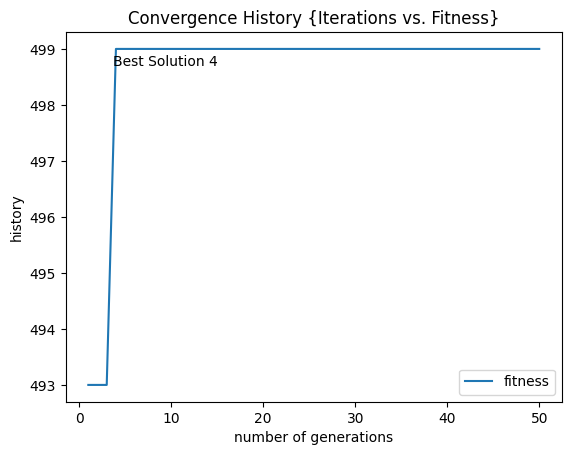

In [85]:
GA.plot_history()

In [86]:
fitness(''.join(map(str, [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])))

0

In [90]:
GA1 = GABIN(population_size=50 \
           , fitness_function=fitness \
           , gene_length=22 \
           , encoding="binary" \
           , selection_method="rank_based" \
           , tournament_size=10 \
           , crossover_method="uniform" \
           , crossover_prob=0.85 \
           , mutation_method="bit-flip" \
           , mutation_rate=0.1, elitism=True)

In [91]:
GA1.evolve(50)

  0%|          | 0/50 [00:00<?, ?it/s]

Generation 1:Best Population: 0001000100101110011100 Best fitness: 497.0
Generation 2:Best Population: 0001000100101110011100 Best fitness: 497.0
Generation 3:Best Population: 0001000100101110011100 Best fitness: 497.0
Generation 4:Best Population: 0001000100101110011100 Best fitness: 497.0
Generation 5:Best Population: 0001000100101110011100 Best fitness: 497.0
Generation 6:Best Population: 0001000100101110011100 Best fitness: 497.0
Generation 7:Best Population: 1011100100100011100011 Best fitness: 499.0
Generation 8:Best Population: 1011100100100011100011 Best fitness: 499.0
Generation 9:Best Population: 1011100100100011100011 Best fitness: 499.0
Generation 10:Best Population: 1011100100100011100011 Best fitness: 499.0
Generation 11:Best Population: 1011100100100011100011 Best fitness: 499.0
Generation 12:Best Population: 1011100100100011100011 Best fitness: 499.0
Generation 13:Best Population: 1011100100100011100011 Best fitness: 499.0
Generation 14:Best Population: 1011100100100011

(array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]),
 499.0)

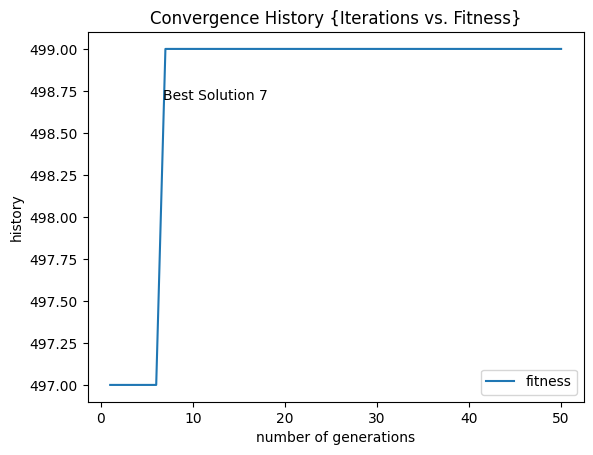

In [92]:
GA1.plot_history()

# MaxOne's

In [93]:
class MaxOnes(GABIN):
    
    def __init__(self, population_size, gene_length, encoding, selection_method,
                 tournament_size=None, crossover_method=None, crossover_prob=0.6, mutation_method=None,
                 mutation_rate=0.1, elitism=False):
        super().__init__(population_size, fitness_function = lambda x : x.count('1'), gene_length=gene_length, encoding=encoding,
                         selection_method = selection_method, tournament_size=tournament_size,
                         crossover_method=crossover_method, crossover_prob=0.6, mutation_method=mutation_method, 
                         mutation_rate=0.1, elitism=elitism)

In [94]:
maxones = MaxOnes(population_size=20,
                  gene_length=10,
                  encoding="binary",
                  selection_method="tournament",
                  tournament_size=5,
                  crossover_method="two-point",
                  crossover_prob=0.7,
                  mutation_method="bit-flip",
                  mutation_rate=0.1,
                  elitism=True)

In [95]:
maxones.evolve(10)

  0%|          | 0/10 [00:00<?, ?it/s]

Generation 1:Best Population: 0011111011 Best fitness: 7.0
Generation 2:Best Population: 0111111011 Best fitness: 8.0
Generation 3:Best Population: 0111111011 Best fitness: 8.0
Generation 4:Best Population: 0111111011 Best fitness: 8.0
Generation 5:Best Population: 0111111011 Best fitness: 8.0
Generation 6:Best Population: 0111111011 Best fitness: 8.0
Generation 7:Best Population: 1111111011 Best fitness: 9.0
Generation 8:Best Population: 1111111011 Best fitness: 9.0
Generation 9:Best Population: 1111111011 Best fitness: 9.0
Generation 10:Best Population: 1111111111 Best fitness: 10.0


(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 10.0)

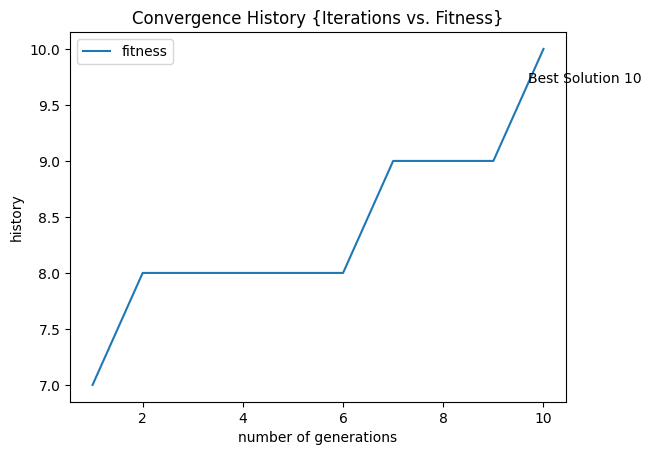

In [96]:
maxones.plot_history()